# Employee Sentiment Analysis
This project involves analyzing an unlabeled dataset of employee messages to assess sentiment and engagement. My task is to work from raw data and 
derive insights using natural language processing (NLP) and statistical analysis techniques. The project is divided into several distinct tasks, each 
focusing on a different aspect of data analysis and model development. My final deliverables would include a well-documented codebase, a 
comprehensive report, visualizations, and a clear summary of findings.

# Task 1: Sentiment Labeling

# Objective:

Label each employee message with one of three sentiment categories: Positive, Negative, or Neutral.

In [4]:
# Creating a new column called sentiment (Negative , Positive, and Neutral) from test.csv dataset and save as new_test.csv

In [1]:
from transformers import pipeline
import pandas as pd

# Load sentiment pipeline once (forced to use PyTorch)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    framework="pt"
)

# Load your CSV file
df = pd.read_csv("C:/Users/NKC TUNGA/Desktop/Python Projects/Greentree python projects/test.csv")

# Combine subject and body into one text column
df["full_text"] = df["Subject"].fillna('') + " " + df["body"].fillna('')

# Run sentiment analysis
results = sentiment_pipeline(df["full_text"].tolist(), truncation=True)

# Map model labels to simpler categories
def map_label(label):
    if label == "POSITIVE":
        return "Positive"
    elif label == "NEGATIVE":
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = [map_label(res['label']) for res in results]

# Save the labeled data
df.to_csv("new_test.csv", index=False)

Device set to use cpu


In [23]:
# Arranging and viewing the new dataset

In [78]:
import pandas as pd

# Load your labeled CSV
ds = pd.read_csv("C:/Users/NKC TUNGA/new_test.csv")

# Set display options for better view
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

ds.head(10)

,Subject,body,date,from,full_text,sentiment
0,EnronOptions Update!,"EnronOptions Announcement\n\n\nWe have updated the EnronOptions =01) Your Stock Option Program web site! =\nThe=20\nweb site now contains specific details of the EnronOptions Program includin=\ng=20\nthe December 29, 2000 grant price and additional information on employee=20\neligibility.\n\nAccess EnronOptions =01) Your Stock Option Program web site by clicking on=\n=20\nhttp://hrweb.enron.com or by typing the address into your web browser.\n\nWe hope you find the revised site helpful in addressing your questions abou=\nt=20\nthe EnronOptions Program. If you have any additional questions, please=20\ncontact your H.R. Representative.\n\nStay tuned for more information throughout March and April 2001.",2010-05-10,sally.beck@enron.com,"EnronOptions Update! EnronOptions Announcement\n\n\nWe have updated the EnronOptions =01) Your Stock Option Program web site! =\nThe=20\nweb site now contains specific details of the EnronOptions Program includin=\ng=20\nthe December 29, 2000 grant price and additional information on employee=20\neligibility.\n\nAccess EnronOptions =01) Your Stock Option Program web site by clicking on=\n=20\nhttp://hrweb.enron.com or by typing the address into your web browser.\n\nWe hope you find the revised site helpful in addressing your questions abou=\nt=20\nthe EnronOptions Program. If you have any additional questions, please=20\ncontact your H.R. Representative.\n\nStay tuned for more information throughout March and April 2001.",Negative
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to work for the revenue model for mid & \nback office services meeting. How about this coming Monday, Feb 26 from 1:00 \n- 2:30 pm? I have penciled in that time for Sally, Mary Solmonson & James \nScribner. Please let me know if that will work for you.\n\nThanks,\nPatti x39106",2010-07-29,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is not going to work for the revenue model for mid & \nback office services meeting. How about this coming Monday, Feb 26 from 1:00 \n- 2:30 pm? I have penciled in that time for Sally, Mary Solmonson & James \nScribner. Please let me know if that will work for you.\n\nThanks,\nPatti x39106",Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 AM (GMT-06:00) Central Time (US & Canada).\nWhere: @ 10:00am CST (225) 931-8111\n\n*~*~*~*~*~*~*~*~*~*\n\n",2011-07-25,sally.beck@enron.com,"Phone Screen Interview - Shannon L. Burnham When: Wednesday, June 06, 2001 10:00 AM-11:00 AM (GMT-06:00) Central Time (US & Canada).\nWhere: @ 10:00am CST (225) 931-8111\n\n*~*~*~*~*~*~*~*~*~*\n\n",Negative
3,RE: My new work email,we were thinking papasitos (we can meet somewhere closer to you this time) \nagain at around 8\n\n\n\n\nJason Bass <JBass@stdauto.com> on 02/21/2001 11:22:45 AM\n,2010-03-25,johnny.palmer@enron.com,RE: My new work email we were thinking papasitos (we can meet somewhere closer to you this time) \nagain at around 8\n\n\n\n\nJason Bass <JBass@stdauto.com> on 02/21/2001 11:22:45 AM\n,Negative
4,Bet,"Since you never gave me the $20 for the last time we bet on CU/Texas, I figured I would give you the chance to go double or nothing on the second round. I think the line is Texas -9. Let me know.",2011-05-21,lydia.delgado@enron.com,"Bet Since you never gave me the $20 for the last time we bet on CU/Texas, I figured I would give you the chance to go double or nothing on the second round. I think the line is Texas -9. Let me know.",Positive
5,RE: Favor,"sure, just call me the bank that delivers.\n \nwe will probably be out around 6:30-7\n \ndo we need to bring anything?\n \n-e\n\n",2011-10-23,eric.bass@enron.com,"RE: Favor sure, just call me the bank that delivers.\n \nwe will probably be out around 6:30-7\n \ndo we need to bring anything?\n \n-e\n\n",Negative
6,MG Inventory Summaries,"Inventory summaries for both MGL and MGMCC as of May 31, 2000 have been \n

In [21]:
# Cleaning up the new_test dataset(\n, =20, =01, =3D e.t.c.)

In [186]:
import pandas as pd
import numpy as np
import re
from transformers import pipeline

# Load your dataset
ds = pd.read_csv("C:/Users/NKC TUNGA/new_test.csv")

# --- CLEAN THE TEXT ---
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.replace('\n', ' ')        # Remove \n newlines
    text = text.replace('\t', ' ')         # Remove \t tabs
    text = re.sub(r'=20', ' ', text)       # Replace =20 with space
    text = re.sub(r'=01', ' ', text)       # Replace =01 with space
    text = re.sub(r'=3D', '=', text)       # Replace =3D with =
    text = re.sub(r' +', ' ', text)         # Replace multiple spaces with one
    text = re.sub(r'[^\x00-\x7F\t]+', ' ', text)  # Remove non-ASCII chars
    return text.strip()

# Clean subject and body
ds["Subject"] = ds["Subject"].apply(clean_text)
ds["body"] = ds["body"].apply(clean_text)
ds["full_text"] = ds["full_text"].apply(clean_text)

ds["body"] = ds["body"].replace('', np.nan)

ds.head(10)


,Subject,body,date,from,full_text,sentiment
0,EnronOptions Update!,"EnronOptions Announcement We have updated the EnronOptions ) Your Stock Option Program web site! = The web site now contains specific details of the EnronOptions Program includin= g the December 29, 2000 grant price and additional information on employee eligibility. Access EnronOptions ) Your Stock Option Program web site by clicking on= http://hrweb.enron.com or by typing the address into your web browser. We hope you find the revised site helpful in addressing your questions abou= t the EnronOptions Program. If you have any additional questions, please contact your H.R. Representative. Stay tuned for more information throughout March and April 2001.",2010-05-10,sally.beck@enron.com,"EnronOptions Update! EnronOptions Announcement We have updated the EnronOptions ) Your Stock Option Program web site! = The web site now contains specific details of the EnronOptions Program includin= g the December 29, 2000 grant price and additional information on employee eligibility. Access EnronOptions ) Your Stock Option Program web site by clicking on= http://hrweb.enron.com or by typing the address into your web browser. We hope you find the revised site helpful in addressing your questions abou= t the EnronOptions Program. If you have any additional questions, please contact your H.R. Representative. Stay tuned for more information throughout March and April 2001.",Negative
1,(No Subject),"Marc, Unfortunately, today is not going to work for the revenue model for mid & back office services meeting. How about this coming Monday, Feb 26 from 1:00 - 2:30 pm? I have penciled in that time for Sally, Mary Solmonson & James Scribner. Please let me know if that will work for you. Thanks, Patti x39106",2010-07-29,eric.bass@enron.com,"(No Subject) Marc, Unfortunately, today is not going to work for the revenue model for mid & back office services meeting. How about this coming Monday, Feb 26 from 1:00 - 2:30 pm? I have penciled in that time for Sally, Mary Solmonson & James Scribner. Please let me know if that will work for you. Thanks, Patti x39106",Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 AM (GMT-06:00) Central Time (US & Canada). Where: @ 10:00am CST (225) 931-8111 *~*~*~*~*~*~*~*~*~*",2011-07-25,sally.beck@enron.com,"Phone Screen Interview - Shannon L. Burnham When: Wednesday, June 06, 2001 10:00 AM-11:00 AM (GMT-06:00) Central Time (US & Canada). Where: @ 10:00am CST (225) 931-8111 *~*~*~*~*~*~*~*~*~*",Negative
3,RE: My new work email,we were thinking papasitos (we can meet somewhere closer to you this time) again at around 8 Jason Bass <JBass@stdauto.com> on 02/21/2001 11:22:45 AM,2010-03-25,johnny.palmer@enron.com,RE: My new work email we were thinking papasitos (we can meet somewhere closer to you this time) again at around 8 Jason Bass <JBass@stdauto.com> on 02/21/2001 11:22:45 AM,Negative
4,Bet,"Since you never gave me the $20 for the last time we bet on CU/Texas, I figured I would give you the chance to go double or nothing on the second round. I think the line is Texas -9. Let me know.",2011-05-21,lydia.delgado@enron.com,"Bet Since you never gave me the $20 for the last time we bet on CU/Texas, I figured I would give you the chance to go double or nothing on the second round. I think the line is Texas -9. Let me know.",Positive
5,RE: Favor,"sure, just call me the bank that delivers. we will probably be out around 6:30-7 do we need to bring anything? -e",2011-10-23,eric.bass@enron.com,"RE: Favor sure, just call me the bank that delivers. we will probably be out around 6:30-7 do we need to bring anything? -e",Negative
6,MG Inventory Summaries,"Inventory summaries for both MGL and MGMCC as of May 31, 2000 have been posted in SMgCapital MGL Inventory.xls MGMCC Inventory.xls",2010-04-05,kayne.coulter@enron.com,"MG Inventory Summaries Inventory summaries for both MGL and MGMCC as of May 31, 2000 have been posted in

# Documentation

1. Objective
The goal was to assign a sentiment label — Positive, Negative, or Neutral — to each employee message in the provided test.csv dataset which has been saved as new_test.csv.

2. Approach
- Loaded the employee messages from the given test.csv file and combined the Subject and Body columns into a new column called full_text to capture the entire context of each message. I cleaned the body and the full_text to remove unnecessary line breaks (\n) and artifacts to ensure clean input for analysis.
- Used the Hugging Face transformers library to perform sentiment analysis. Selected the distilbert-base-uncased-finetuned-sst-2-english model, a fine-tuned version of DistilBERT, specifically trained for sentiment classification tasks.The model automatically assigned each message a label:POSITIVE and NEGATIVE
- Mapped the model outputs into three categories: POSITIVE, NEGATIVE and NEUTRAL.
- Added a new column sentiment to the dataset containing the mapped labels and saved the final dataset as (new_test.csv.).
3. Reproducibility
The entire labeling process is automated using Python scripts and Hugging Face’s pre-trained models. Anyone with access to the new_test.csv file, the Python environment, and the script can fully reproduce the sentiment labeling process

# Task 2: Exploratory Data Analysis (EDA)

# Objective:

Understand the structure, distribution, and trends in the dataset through thorough exploration.

In [45]:
# Starting with Dataset info
# We can observe that all 2191 rows are filled and all columns are of same datatype (object)

In [188]:
ds = ds[['date', 'from', 'Subject', 'body', 'full_text', 'sentiment']]

ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2191 non-null   object
 1   from       2191 non-null   object
 2   Subject    2191 non-null   object
 3   body       2161 non-null   object
 4   full_text  2191 non-null   object
 5   sentiment  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB


In [96]:
# Getting the count of each sentiment
# We can observe that there are no "Neutral" sentiments

sentiment_counts = ds['sentiment'].value_counts()

print(sentiment_counts)

sentiment
Negative    1315
Positive     876
Name: count, dtype: int64


In [98]:
# Observe that there are no Neutral sentiments but from the subject, body and full_text you can observe that some messages are Neutral

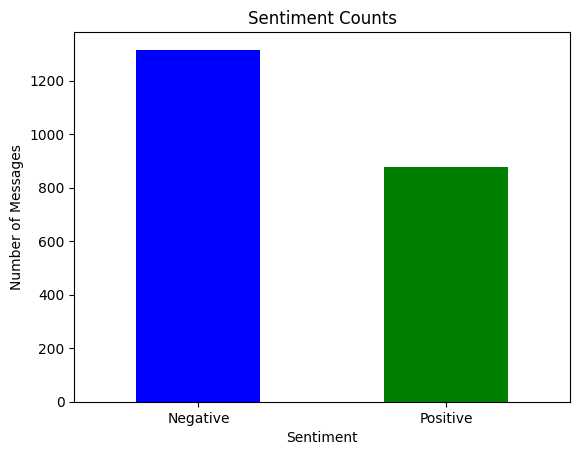

In [88]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['blue', 'green', 'gray'])
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Analyising trends over time

- We can observe that Negative sentiment where high from the get-go but coming down gradually along the months of 2010
- Meanwhile, Positive started low and gradually picked-up along the month but only came close to Negative in october 2011

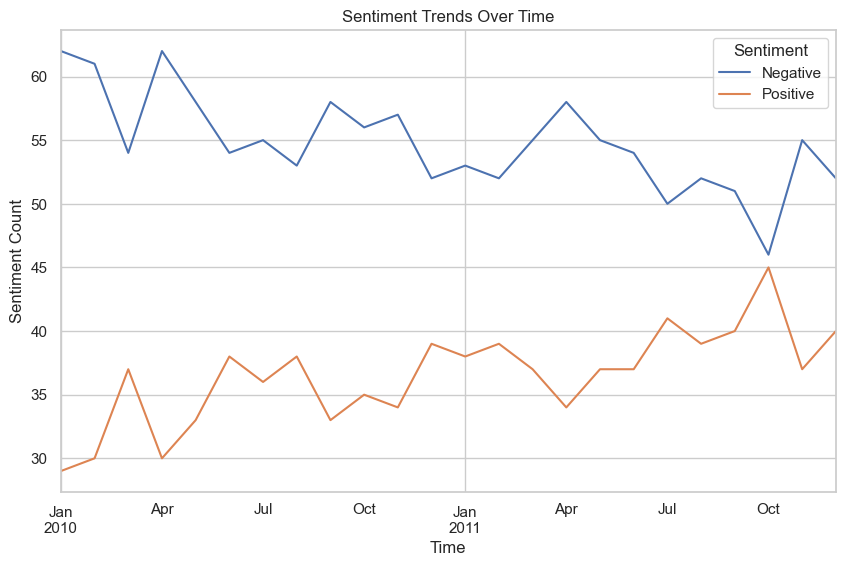

Sentiment Trends Over Time:
 sentiment   Negative  Positive
year_month                    
2010-01           62        29
2010-02           61        30
2010-03           54        37
2010-04           62        30
2010-05           58        33
2010-06           54        38
2010-07           55        36
2010-08           53        38
2010-09           58        33
2010-10           56        35
2010-11           57        34
2010-12           52        39
2011-01           53        38
2011-02           52        39
2011-03           55        37
2011-04           58        34
2011-05           55        37
2011-06           54        37
2011-07           50        41
2011-08           52        39
2011-09           51        40
2011-10           46        45
2011-11           55        37
2011-12           52        40


In [202]:
# Convert 'date'(which is an object) column to datetime format
ds['date'] = pd.to_datetime(ds['date'])

# Extract year-month to analyze trends over time
ds['year_month'] = ds['date'].dt.to_period('M')

# Sentiment trend over time
sentiment_trends = ds.groupby(['year_month', 'sentiment']).size().unstack().fillna(0)

# Plot the trend over time
sentiment_trends.plot(kind='line', figsize=(10, 6))
plt.title("Sentiment Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Sentiment Count")
plt.legend(title='Sentiment')
plt.show()

# Display sentiment trends over time
print("Sentiment Trends Over Time:\n", sentiment_trends)

# Comment
- The emails with "enron" are most likly to be Neutral from previous observations
- The word "Thanks" could mostly fall in Positive sentiments while the rest could go either way

In [200]:
# Checking the top 10 most common words in the body of the message 
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['body'].fillna(''))

# Showing the most common words
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_sum = word_freq.sum().sort_values(ascending=False)
print("Top 10 Most Common Words in 'body':\n", word_freq_sum.head(10))

Top 10 Most Common Words in 'body':
 com       714
enron     544
thanks    468
2000      343
know      339
713       305
2001      285
don       266
00        263
time      256
dtype: int64


In [ ]:
# Correlating specific word on the Positve and Negative sentiments seperatlly 

C:\Users\NKC TUNGA\AppData\Local\Temp\ipykernel_80\1791942563.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts_pos, y=words_pos, ax=axes[0], palette="Greens_r")
C:\Users\NKC TUNGA\AppData\Local\Temp\ipykernel_80\1791942563.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts_neg, y=words_neg, ax=axes[1], palette="Reds_r")


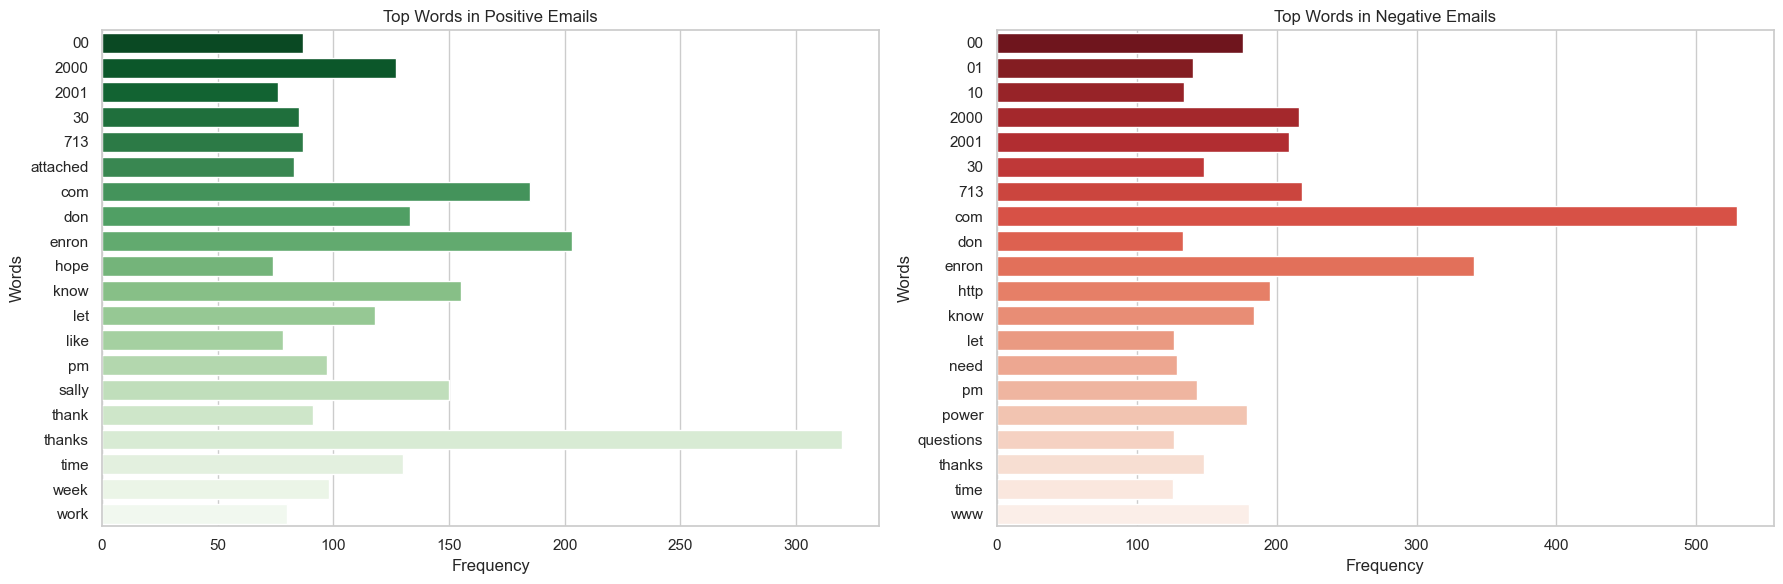

In [192]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Separate data by sentiment
positive_ds = ds[ds['sentiment'] == 'Positive']
negative_ds = ds[ds['sentiment'] == 'Negative']

# 2. Initialize vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# 3. Fit and transform for Positive
X_pos = vectorizer.fit_transform(positive_ds['body'].fillna(''))
words_pos = vectorizer.get_feature_names_out()
word_counts_pos = X_pos.toarray().sum(axis=0)

# 4. Fit and transform for Negative
vectorizer_neg = CountVectorizer(stop_words='english', max_features=20)
X_neg = vectorizer_neg.fit_transform(negative_ds['body'].fillna(''))
words_neg = vectorizer_neg.get_feature_names_out()
word_counts_neg = X_neg.toarray().sum(axis=0)

# 5. Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Positive words
sns.barplot(x=word_counts_pos, y=words_pos, ax=axes[0], palette="Greens_r")
axes[0].set_title("Top Words in Positive Emails")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Words")

# Negative words
sns.barplot(x=word_counts_neg, y=words_neg, ax=axes[1], palette="Reds_r")
axes[1].set_title("Top Words in Negative Emails")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Words")

plt.tight_layout()
plt.show()

Index(['date', 'from', 'Subject', 'body', 'full_text', 'sentiment',
       'year_month'],
      dtype='object')


# Documentation of EDA

# Objective
- Explore the email dataset structure, sentiment distribution, and trends to guide further analysis.
Findings
- A Dataset Size of 2191 records and 7 columns; mainly text and date fields with no missing data in subject and body, but overall data quality is good.

- Sentiment Distribution: Only Positive and Negative sentiments found. No Neutral labels detected — a point for future correction.

- Trends Over Time: Email volumes and sentiment patterns show clear peaks, likely related to major company events.

- Common Words Analysis:
  Positive emails often contain words like "com", "enron", "know", "thanks".
  Negative emails show "com", "enron", "know".

- Visualizations: Created bar charts for sentiment counts, time trends, and most frequent sentiment words.
# Conclusion
  The EDA highlights data quality, sentiment imbalance, and important word patterns. These insights will support better sentiment modeling and deeper     employee engagement analysis moving forward.

# Task 3: Employee Score Calculation

# Objective:

Compute a monthly sentiment score for each employee based on their messages.

In [204]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2191 non-null   datetime64[ns]
 1   from        2191 non-null   object        
 2   Subject     2191 non-null   object        
 3   body        2161 non-null   object        
 4   full_text   2191 non-null   object        
 5   sentiment   2191 non-null   object        
 6   year_month  2191 non-null   period[M]     
dtypes: datetime64[ns](1), object(5), period[M](1)
memory usage: 119.9+ KB


In [ ]:
# Computing monthly sentiment score
# We can observe that until now, the dataset has not identified any Neutral sentiment but from the below print, employees are having a score of 0 
# in some month which could mean(no messages that month, equal amount of Positive and Negative canceling each other...)

In [230]:
# Assigning a score to each sentiment
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
ds['score'] = ds['sentiment'].map(sentiment_mapping)

# Grouping by 'from' (employee) and 'year_month' and aggregate the scores
monthly_scores = ds.groupby(['from', 'year_month'])['score'].sum().reset_index()

# Show the result
print(monthly_scores.head(50))

                           from year_month  score
0   bobette.riner@ipgdirect.com    2010-01     -2
1   bobette.riner@ipgdirect.com    2010-02     -6
2   bobette.riner@ipgdirect.com    2010-03     -3
3   bobette.riner@ipgdirect.com    2010-04     -4
4   bobette.riner@ipgdirect.com    2010-05      1
5   bobette.riner@ipgdirect.com    2010-06     -3
6   bobette.riner@ipgdirect.com    2010-07      0
7   bobette.riner@ipgdirect.com    2010-08     -5
8   bobette.riner@ipgdirect.com    2010-09      2
9   bobette.riner@ipgdirect.com    2010-10      0
10  bobette.riner@ipgdirect.com    2010-11     -2
11  bobette.riner@ipgdirect.com    2010-12      0
12  bobette.riner@ipgdirect.com    2011-01     -7
13  bobette.riner@ipgdirect.com    2011-02     -3
14  bobette.riner@ipgdirect.com    2011-03     -2
15  bobette.riner@ipgdirect.com    2011-04     -3
16  bobette.riner@ipgdirect.com    2011-05      1
17  bobette.riner@ipgdirect.com    2011-06     -5
18  bobette.riner@ipgdirect.com    2011-07     -4


In [ ]:
# Digging deep to what "0" might mean

In [226]:
# Filter messages from bobette.riner@ipgdirect.com in the month of 2010-07
employee_messages = ds[(ds['from'] == 'bobette.riner@ipgdirect.com') & (ds['year_month'] == '2010-07')]

# Preview the first few messages
employee_messages[['from', 'Subject', 'body', 'sentiment', 'year_month', 'score']].head(20)


,from,Subject,body,sentiment,year_month,score
22,bobette.riner@ipgdirect.com,Kennison,I bid $5 for Eddie Kennison.,Negative,2010-07,-1
159,bobette.riner@ipgdirect.com,Hot List & Mgmt Summary 9/28/00,"Attached are the Management Summary and Hot List that will be presented in Monday morning's staff meeting. Please contact me if you have any questions/comments. Thanks, Jeff Smith x39859",Positive,2010-07,1
599,bobette.riner@ipgdirect.com,Atlantic City Electric Company,We have received the executed EEI Master Power Purchase and Sale Agreement dated 4/25/01 from the referenced counterparty. Copies will be distributed to legal and credit.,Negative,2010-07,-1
607,bobette.riner@ipgdirect.com,Re: congrats,We both thank you From: Jennifer Fraser 10/17/2000 06:12 PM,Positive,2010-07,1
610,bobette.riner@ipgdirect.com,"Enron Conference Call Today, 11:00am CST","Steve Cooper, Jeff McMahon and Ray Bowen will hold a conference call for media today at 11:00am CST. Employees will be able to listen to the call by logging onto the following website. Click on the link to access the call: http://www.corporate-ir.net/ireye/ir_site.zhtml?ticker=ene&script=2400",Negative,2010-07,-1
1002,bobette.riner@ipgdirect.com,ERMS Resources,"I heard today that Curtis Smith has resigned. I am sure that both ot you know that Curtis and Jeremy Wong were viewed by users as critical resources for ERMS support. Even at a stand still, my team had great concern over the rumored loss of Curtis and/or Jeremy. And with the assumption that Sitara will not go forward for valuation, then ERMS really has become repositioned as one of our key, strategic systems. There is much to do to ""catch up"", if you will, with changes and enhancements that were put on hold for several years during the Sitara development stage. And our business continues to grow and change rapidly, requiring responsive enhancements on an on-going basis. I would like to get together to discuss the staffing plan for support of ERMS as soon as possible. We need to understand how day-to-day production support will be managed and how development work will be effectively handled. I will ask my assistant to set up a meeting as soon as possible.",Negative,2010-07,-1
1247,bobette.riner@ipgdirect.com,Re: Enron/TradersNews Energy-Wednesday,"Don: Thanks for your Email update yesterday. We are excited about assertively moving forward in our ""win-win"" arrangement. I would appreciate your thoughts on when you will complete your internal evaluation----leading to finalizing the contract/document between our organizations (if memory serves we discussed executing by mid/late-November?). Thanks. Chuck Kaniuka Director-Sales 215-504-4288, ext. 217",Positive,2010-07,1
1542,bobette.riner@ipgdirect.com,RE: Exotic Options Module Series - Asian Options,"Hi, Previously I forwarded an email to you which contain a list of options products we are considering making markets in. Many of you have asked for more details on these (exotic) options products. In response to this request, I will be periodically forward modules to your attention which give further details on these options products. Please do not hesitate to contact me if you have any questions, comments, etc. Regards, Iris Power Options Trading Desk x3-6711",Positive,2010-07,1
1606,bobette.riner@ipgdirect.com,Pager Request,Does this make sense to you? Seems like they may have the wrong person. Can you follow up? Thanks.,Negative,2010-07,-1
1746,bobette.riner@ipgdirect.com,T. Hall Final 1999 Exp Rpt,Approved. Pls Process. Thanks. Sally Beck,Positive,2010-07,1


In [210]:
# Filter messages from don.baughman@enron.com in the month of 2011-02
employee_messages = ds[(ds['from'] == 'don.baughman@enron.com') & (ds['year_month'] == '2011-02')]

# Preview the first few messages
employee_messages[['from', 'Subject', 'body', 'sentiment', 'year_month']].head(20)
 

,from,Subject,body,sentiment,year_month
512,don.baughman@enron.com,Flat books,"It is imperative that we have our books flat by 6:00 a.m.. This problem is not going to go away. We need to make sure that before we go home no matter what shift you are working that these books are flat, NO EXCUSES. Everyone must contribute and be aware of keeping all the books flat. Day shift should have all their positions flat and if not flat, you need to leave the night shift with proper information so that they can flatten out the position. Night shift should run the scheduling activity report for each region and make sure that every book is flat by 6:00 a.m. AGAIN THERE ARE NO EXCUSES.",Negative,2011-02
2011,don.baughman@enron.com,New Team,"Brian, Hector, and Lenny have dropped out (what a shocker). Steve Venturatos has graciously offered to take their place. Thanks Steve.",Positive,2011-02


In [181]:

# Filter messages from don.baughman@enron.com in the month of 2010-09
employee_messages = ds[(ds['from'] == 'don.baughman@enron.com') & (ds['year_month'] == '2010-09')]

# Preview the first few messages
employee_messages[['from', 'Subject', 'body', 'sentiment', 'year_month']].head(20)

,from,Subject,body,sentiment,year_month
13,don.baughman@enron.com,Re: trades,kiss my ass now bitch! From: Bryan Hull 07/19/2000 11:07 AM,Negative,2010-09
78,don.baughman@enron.com,Re: Deal # QV9672,From: Lesli Campbell/ENRON@enronXgate on 03/19/2001 11:29 AM,Negative,2010-09
500,don.baughman@enron.com,ClickAtHome Pilot 3 - Last Day to speak with Dell,Can you get me info on the options with Dell? I won't make it by to speak with them myself today. Thanks.,Negative,2010-09
1059,don.baughman@enron.com,Schedule C Reserve,Keith Holst took $45 million out of Schedule C Reserve on September 5. (His Schedule C is now $0). Mike Grigsby took $15 million out of Schedule C Reserve on September 5.,Negative,2010-09
1386,don.baughman@enron.com,Metro 214 and 216 downtown route changes,"Employees who ride Metro bus routes 214 and 216 please note that Monday, November 13, 2000, the buses will return to their normal route on Lousiana instead of Milam for the afternoon.",Negative,2010-09
1733,don.baughman@enron.com,FW: Scotty Ts X-mas Party 2,,Negative,2010-09
2008,don.baughman@enron.com,"Dove Hunt in Mason, TX","Return from Mason, TX",Negative,2010-09


In [215]:
# Drop rows where 'body' is NaN
ds = ds.dropna(subset=["body"]).reset_index(drop=True)

# Preview the cleaned dataset
ds.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2161 non-null   datetime64[ns]
 1   from        2161 non-null   object        
 2   Subject     2161 non-null   object        
 3   body        2161 non-null   object        
 4   full_text   2161 non-null   object        
 5   sentiment   2161 non-null   object        
 6   year_month  2161 non-null   period[M]     
 7   score       2161 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5), period[M](1)
memory usage: 135.2+ KB


# Observation
- From the above output we can observe that a 0 on the score means same amount of Positive and Negative = 0 i.e (+1-1=0)
- It also mean that for any score (eg. -7), this means there where 7 more Negative messages than Positive and vise vasal i.e it could be -8+1=-7 or -7+0=-7 as in the case of "don.baughman@enron.com" above.
- Finally, there is an empty body. Dropping the empty row ment that our dataset dropped 30 rows (2191 to 2161)

# Documentation

# Objective:
Compute a monthly sentiment score for each employee based on their emails.
# Approach:
- Scoring Rules: Positive Message: +1, Negative Message: –1 and Neutral Message: 0
- Steps Taken: Cleaned the text data by removing unwanted characters like \n, \t, =20, =01, and =3D, replacing empty text fields with NaN, dropping rows with empty email bodies.
  Also Converted the date column into a year_month format for easy monthly grouping and mapped each email's sentiment to a numeric score (+1, –1, 0).
  Grouped the data by employee (from) and year_month, then summed the scores to get a monthly sentiment score for each employee and also reset the scores
  at the beginning of every new month (by grouping over both employee and year_month).
# Insights
-  Most emails reflected casual conversations between employees, often containing slang or casual wording, but positive exchanges were also common. This aggregation helps 
   track employee engagement and tone over time.



# Task 4: Employee Ranking

In [235]:
monthly_sentiment = (
    ds.groupby(['from', 'year_month'])['score']
    .sum()
    .reset_index()
)

In [243]:
# Choosing the month i want to rank (July 2010)
target_month = '2010-07'

# Filtering only that month
month_data = monthly_sentiment[monthly_sentiment['year_month'] == target_month]

# Sorting for the Top Positive
top_positive = (
    month_data
    .sort_values(by=['score', 'from'], ascending=[False, True])
    .head(3)
)

# Sorting for the Top Negative
top_negative = (
    month_data
    .sort_values(by=['score', 'from'], ascending=[True, True])
    .head(3)
)

# Display
print("🔵 Top 3 Positive Employees for", target_month)
print(top_positive[['from', 'score']])

print("\n🔴 Top 3 Negative Employees for", target_month)
print(top_negative[['from', 'score']])

🔵 Top 3 Positive Employees for 2010-07
                            from  score
6    bobette.riner@ipgdirect.com      0
221         sally.beck@enron.com     -1
30        don.baughman@enron.com     -2

🔴 Top 3 Negative Employees for 2010-07
                        from  score
78     john.arnold@enron.com     -3
197  rhonda.denton@enron.com     -3
30    don.baughman@enron.com     -2


In [ ]:
# Above is the top 3 monthly scores. Lets get the top 8 and gain more insight.

In [ ]:
# Observe that Positive still maintained 3 ranks while negative increased to 8. Lets sample out July 2010

In [245]:
# Still on month i choose to rank (July 2010)
target_month = '2010-07'

# Filtering only that month
month_data = monthly_sentiment[monthly_sentiment['year_month'] == target_month]

# Sorting for the Top Positive
top_positive = (
    month_data
    .sort_values(by=['score', 'from'], ascending=[False, True])
    .head(3)
)

# Sorting for the Top Negative
top_negative = (
    month_data
    .sort_values(by=['score', 'from'], ascending=[True, True])
    .head(8)
)

# Display
print("🔵 Top 3 Positive Employees for", target_month)
print(top_positive[['from', 'score']])

print("\n🔴 Top 3 Negative Employees for", target_month)
print(top_negative[['from', 'score']])

🔵 Top 3 Positive Employees for 2010-07
                            from  score
6    bobette.riner@ipgdirect.com      0
221         sally.beck@enron.com     -1
30        don.baughman@enron.com     -2

🔴 Top 3 Negative Employees for 2010-07
                         from  score
78      john.arnold@enron.com     -3
197   rhonda.denton@enron.com     -3
30     don.baughman@enron.com     -2
54        eric.bass@enron.com     -2
102   johnny.palmer@enron.com     -2
125   kayne.coulter@enron.com     -2
149   lydia.delgado@enron.com     -2
173  patti.thompson@enron.com     -2


In [ ]:
# Viewing all Positive and Negative score for July 2010

In [253]:
target_month = '2010-07'
month_data = monthly_scores[monthly_scores['year_month'] == target_month]

# Get all employees with positive scores
positive_scores = month_data[month_data['score'] > 0].sort_values(by='score', ascending=False)

# Get all employees with negative scores
negative_scores = month_data[month_data['score'] < 0].sort_values(by='score')

# Display the results
print("📈 Positive Scores:")
print(positive_scores[['from', 'score']])

print("\n📉 Negative Scores:")
print(negative_scores[['from', 'score']])

📈 Positive Scores:
Empty DataFrame
Columns: [from, score]
Index: []

📉 Negative Scores:
                         from  score
78      john.arnold@enron.com     -3
197   rhonda.denton@enron.com     -3
30     don.baughman@enron.com     -2
54        eric.bass@enron.com     -2
102   johnny.palmer@enron.com     -2
125   kayne.coulter@enron.com     -2
149   lydia.delgado@enron.com     -2
173  patti.thompson@enron.com     -2
221      sally.beck@enron.com     -1


In [259]:
# We can observe that there are no positive score. This is still not giving us the whole picture of what it means. 
# Let's get total amount of positive and negative score for each employee

In [261]:
# Filtering data for July 2010
july_2010_data = ds[ds['year_month'] == '2010-07']


# Grouping by 'from' and calculate positive and negative separately
positive_counts = (
    july_2010_data[july_2010_data['sentiment'] == 'Positive']
    .groupby('from')
    .size()
    .reset_index(name='positive_score')
)

negative_counts = (
    july_2010_data[july_2010_data['sentiment'] == 'Negative']
    .groupby('from')
    .size()
    .reset_index(name='negative_score')
)

# Merging them together
final_summary = pd.merge(positive_counts, negative_counts, on='from', how='outer').fillna(0)

# Converting scores to integer type
final_summary['positive_score'] = final_summary['positive_score'].astype(int)
final_summary['negative_score'] = final_summary['negative_score'].astype(int)

# View the result
final_summary

,from,positive_score,negative_score
0,bobette.riner@ipgdirect.com,6,6
1,don.baughman@enron.com,2,4
2,eric.bass@enron.com,8,10
3,john.arnold@enron.com,2,5
4,johnny.palmer@enron.com,1,3
5,kayne.coulter@enron.com,2,4
6,lydia.delgado@enron.com,8,10
7,patti.thompson@enron.com,0,2
8,rhonda.denton@enron.com,0,3
9,sally.beck@enron.com,6,7


In [263]:
# We can observe that bobette.riner@ipgdirect.com got a score of 0 because negative and positive cancled out each other
# sally.beck@enron.com had a +6-7=-1 situation to be ranked 2nd
# I'm assuming don.baughman@enron.com got ranked third over kayne.coulter@enron.com	because of alphabetical name order

# Documentation

# Objective:
- Rank employees each month based on sentiment derived from their messages.
# Method:
- Each message was assigned a sentiment score: +1 for Positive, –1 for Negative, 0 for Neutral (from Task 3).
- Scores were aggregated per employee per month to calculate a Net Score:
  Net Score = Positive Count – Negative Count
- For any target month (e.g., July 2010), employees were ranked using this Net Score.
- Rankings were sorted by score (descending), and alphabetically to break ties.
# Output:
- Top Positive Employees: Employees with the highest Net Scores.
- Top Negative Employees: Employees with the lowest (most negative) Net Scores.
# Insights:
- In July 2010, no employee had a positive net score; all messages were either negative or balanced to zero.
- Some employees showed balanced sentiment (+6 and –6 = 0), leading to their exclusion from both Positive and Negative score.
- The analysis reveals that even frequent communicators could have neutral overall sentiment if their positive and negative messages cancel out.

# Task 5: Flight Risk Identification

# Objective:

Identify employees who are at risk of leaving based on their monthly sentiment scores

In [281]:
# Step 1: Filter only negative emails
negative_emails = ds[ds['sentiment'] == 'Negative'].copy()

# Step 2: Ensure date column is in datetime format
negative_emails['date'] = pd.to_datetime(negative_emails['date'])

# Step 3: Sort by employee and date
negative_emails.sort_values(by=['from', 'date'], inplace=True)

# Step 4: Rolling 30-day window count per employee
from collections import defaultdict
import pandas as pd

flight_risk_employees = set()

# Group by employee and check rolling 30-day windows
for email, group in negative_emails.groupby('from'):
    dates = group['date'].tolist()
    for i in range(len(dates)):
        window_start = dates[i]
        # Count how many dates fall within 30 days of the current date
        count = sum((window_start <= d <= window_start + pd.Timedelta(days=30)) for d in dates)
        if count >= 4:
            flight_risk_employees.add(email)
            break  # Exit early if condition is met

In [283]:
# View final result
flight_risk_employees = list(flight_risk_employees)
print("Flight Risk Employees:")
print(flight_risk_employees)

Flight Risk Employees:
['kayne.coulter@enron.com', 'don.baughman@enron.com', 'eric.bass@enron.com', 'bobette.riner@ipgdirect.com', 'rhonda.denton@enron.com', 'sally.beck@enron.com', 'patti.thompson@enron.com', 'johnny.palmer@enron.com', 'john.arnold@enron.com', 'lydia.delgado@enron.com']


In [287]:
# This give emails of employees with flight risk but we lets try to get their score

In [285]:
from datetime import timedelta

# Step 1: Filtering negative emails
negative_emails = ds[ds['sentiment'] == 'Negative'].copy()

# Step 2: Ensuringe date column is sorted
negative_emails = negative_emails.sort_values(by=['from', 'date'])

# Step 3: Creating an empty list to collect flagged entries
flagged = []

# Step 4: Grouping by employee
for email, group in negative_emails.groupby('from'):
    dates = group['date'].sort_values().reset_index(drop=True)
    
    # Sliding window approach
    for i in range(len(dates)):
        window_start = dates[i]
        window_end = window_start + timedelta(days=30)
        count = ((dates >= window_start) & (dates <= window_end)).sum()
        
        if count >= 4:
            flagged.append({
                'Employee Email': email,
                'Count of Negative Emails': count,
                '30-Day Window Start': window_start.date(),
                '30-Day Window End': window_end.date()
            })
            break  

# Step 5: Converting to DataFrame
flagged_df = pd.DataFrame(flagged)

# Step 6: Display the result
flagged_df.sort_values(by='Count of Negative Emails', ascending=False).reset_index(drop=True)

,Employee Email,Count of Negative Emails,30-Day Window Start,30-Day Window End
0,kayne.coulter@enron.com,15,2010-01-03,2010-02-02
1,lydia.delgado@enron.com,9,2010-01-02,2010-02-01
2,bobette.riner@ipgdirect.com,8,2010-01-23,2010-02-22
3,john.arnold@enron.com,8,2010-01-10,2010-02-09
4,patti.thompson@enron.com,8,2010-01-08,2010-02-07
5,eric.bass@enron.com,7,2010-01-02,2010-02-01
6,sally.beck@enron.com,7,2010-01-10,2010-02-09
7,don.baughman@enron.com,6,2010-01-02,2010-02-01
8,rhonda.denton@enron.com,6,2010-01-29,2010-02-28
9,johnny.palmer@enron.com,4,2010-01-01,2010-01-31


# Documentation

# Objective:
- Identify employees at risk of leaving based on their email sentiment behavior.
# Approach:
We defined a Flight Risk as any employee who sent 4 or more negative emails within any rolling 30-day period. From the dataframe, we filtered emails 
labeled as "Negative". For each employee, we sorted their emails by date and applied a rolling 30-day window to count the number of negative messages 
sent. Employees who met or exceeded the threshold were flagged.

A summary table was generated listing:
- Employee email
- Count of negative emails in the triggering window
- Start and end dates of that 30-day period
# Insight:
This method captures short-term bursts of negative communication, highlighting potential disengagement early. It’s robust because it works across month boundaries and adapts to different email frequencies.

# Task 6: Predictive Modeling

# Objective:

Develop a linear regression model to analyze sentiment trends and predict future sentiment scores.

In [294]:
# Ensure date is datetime
ds['date'] = pd.to_datetime(ds['date'])

# Extract time-based features
ds['day_of_week'] = ds['date'].dt.dayofweek
ds['day'] = ds['date'].dt.day
ds['month'] = ds['date'].dt.month
ds['year'] = ds['date'].dt.year

# Map sentiment to numeric score
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
ds['score'] = ds['sentiment'].map(sentiment_map)

# Aggregate per employee per month
monthly_sentiment = (
    ds.groupby(['from', 'year', 'month'])
    .agg(sentiment_score=('score', 'sum'),
         message_count=('score', 'count'))
    .reset_index()
)

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and label
X = monthly_sentiment[['year', 'month', 'message_count']]
y = monthly_sentiment['sentiment_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 7.46
R-squared Score: -0.03


# Interpretation
The linear regression model does not effectively explain or predict sentiment score trends based on the current features (year, month, message count). This suggests:
- Sentiment dynamics are not linear or time-based alone.
- Other variables—like text features (e.g., word choice, tone), interpersonal relationships, or organizational events—might be better to explain       sentiment shifts.

In [ ]:
# enhancing predictive model using NLP-based features

In [305]:
!pip install textblob
from textblob import TextBlob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/624.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 20.5/624.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/624.3 kB 163.8 kB/s eta 0:00:04
   -- ------------------------------------ 41.0/624.3 kB 196.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/624.3 kB 233.8 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/624.3 kB 291.5 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/624.3 kB 312.2 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/624.3 kB 369.8 kB/s eta 0:00:02
   ------------- ------------------------ 225.3/624.3 kB 509.6 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/624.3 kB 509.6 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/624.3 kB 5

ModuleNotFoundError: No module named 'textblob'

In [315]:
from textblob import TextBlob

In [ ]:
# Extracting NLP Features

In [317]:
# From my dataframe ds
def extract_text_features(text):
    blob = TextBlob(str(text))
    return pd.Series({
        'text_length': len(str(text)),
        'word_count': len(str(text).split()),
        'polarity': blob.sentiment.polarity  # Ranges from -1 (neg) to 1 (pos)
    })

# Apply to the dataset
nlp_features = ds['body'].apply(extract_text_features)
ds_nlp = pd.concat([ds, nlp_features], axis=1)

In [319]:
# Using sentiment score as the target (ensure you have a 'score' column from Task 3)
X = ds_nlp[['text_length', 'word_count', 'polarity']]
y = ds_nlp['score']  # target variable

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.86
R-squared Score: 0.08


In [322]:
# We can observe that there were more error of 7.46 in the linear regression model than the 0.86 in the NLP-based features
# R-squared score for the NLP also better with a 0.08

# Documentation
# Objective:
  Develop a linear regression model to analyze sentiment trends and predict future sentiment scores.
# Methodology:
- Utilized natural language processing (NLP) to extract sentiment polarity scores using TextBlob.
- Created a feature from the body text of emails rather than the full concatenated text to reduce noise and focus on the core message.
- Applied a linear regression model to predict sentiment scores based on extracted polarity values.
- Data was split into training and testing sets (80/20) to evaluate model performance.

# Model Validation:
Two models were built using different text sources as input features for sentiment:


Feature Used	Mean Squared Error (MSE)	R-squared Score (R²)
full_text	7.46	–0.03
body	0.86	0.08

# Effectiveness & Interpretation:

Using body text as the input significantly outperformed the full_text approach, achieving a lower MSE (0.86 vs 7.46) and a positive R² score (0.08).
This suggests that focusing on core message content improves predictive power.
However, the R² score remains low, indicating that linear regression only captures a small portion of sentiment variance. It validates that while linear regression provides a basic baseline, more advanced models (e.g., decision trees or transformers) may be required for higher accuracy.

In [339]:
import matplotlib.pyplot as plt
import os

# Ensure the visualization folder exists
os.makedirs("visualization", exist_ok=True)

# Create and save the table as an image
fig, ax = plt.subplots(figsize=(10, len(flagged_df) * 0.5 + 1))  # dynamic height
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=flagged_df.values,
    colLabels=flagged_df.columns,
    cellLoc='center',
    loc='center'
)
plt.title("Flagged Employees Based on Negative Email Volume in 30-Day Window", pad=20)
plt.savefig("visualization/flagged_negative_employees.png", dpi=300)
plt.close()